In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import glob
import pandas as pd
import dlib
import cv2
import urllib
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers import Dense, Dropout
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam 

In [3]:
data_path = '/content/drive/MyDrive/pain-management system/Dataset/'

In [4]:
non_pain_class = []
pain_class = []
non_pain_path = os.path.join(data_path,'NonPain/*')
pain_path = os.path.join(data_path,'Pain/*')
for name in glob.glob(non_pain_path):
  non_pain_class.append(name)
for name in glob.glob(pain_path):
  pain_class.append(name)

In [5]:
frontalface_detector = dlib.get_frontal_face_detector()

def rect_to_bb(rect):
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y
    return (x, y, w, h)
    
def detect_face(image_url):
    image = cv2.imread(image_url)
    # try:
    # url_response = urllib.request.urlopen(image_url)
    # img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
    # image = cv2.imdecode(image_url, -1)
    rects = frontalface_detector(image, 1)
    
    if len(rects) < 1:
        return "No Face Detected"
    for (i, rect) in enumerate(rects):
      (x, y, w, h) = rect_to_bb(rect)
      start_point = (int(x),int(y))
      end_point = (int(x + w),int(y + h))
      print(x,y,w,h)
      cv2.rectangle(image, start_point, end_point, (0, 255, 0), 2)

    plt.imshow(image, interpolation='nearest')
    plt.axis('off')
    plt.show()

In [6]:
img = non_pain_class[0]

149 25 62 62


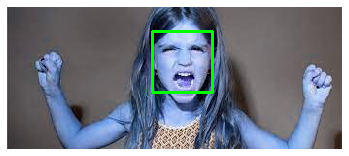

In [7]:
detect_face('/content/drive/MyDrive/pain-management system/Dataset/NonPain/download (1).jpg')

In [8]:
data_label1 = []
for i in range (len(non_pain_class)):
  data_label1.append(0)

data1 = {'filename':non_pain_class, 'label': data_label1}
df1 =  pd.DataFrame(data1)

data_label2 = []
for i in range (len(pain_class)):
  data_label2.append(1)

data2 = {'filename':pain_class, 'label': data_label2}
df2 =  pd.DataFrame(data2)

In [9]:
train1=df1.sample(frac=0.9,random_state=200) #random state is a seed value
test1=df1.drop(train1.index)

train2=df2.sample(frac=0.9,random_state=200) #random state is a seed value
test2=df2.drop(train2.index)

In [10]:
train_frames = [train1, train2]
test_frames = [test1, test2]
train = pd.concat(train_frames)
test = pd.concat(test_frames)

In [11]:
train_X = train['filename']
train_Y = train['label']

test_X = test['filename']
test_Y = test['label']

In [ ]:
X_train = []
for i in train_X:
  image = cv2.imread(i)
  dim = (100, 100)
  # resize image
  resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA) 
  img = resized / 255.0
  X_train.append(img)
X_test = []
for i in test_X:
  image = cv2.imread(i)
  dim = (100, 100)
  # resize image
  resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA) 
  img = resized / 255.0
  X_test.append(img)

In [ ]:
plt.imshow(X_train[200])

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(128,(3,3),activation = 'relu',input_shape = (100,100,3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   
                                   # tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                   
                                   tf.keras.layers.Conv2D(16,(3,3),activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                  tf.keras.layers.Flatten(),
                                   #
                                  tf.keras.layers.Dense(512,activation='relu'),
                                   #
                                  tf.keras.layers.Dense(1,activation='sigmoid'),
                                   ])

In [ ]:
# Convert to numpy array
X_train = np.array(X_train)
train_Y = np.array(train_Y)
X_test = np.array(X_test)
test_Y = np.array(test_Y)

X_train = X_train.reshape(len(X_train),100,100,3)
train_Y = train_Y.reshape(len(train_Y),1)
X_test = X_test.reshape(len(X_test),100,100,3)
test_Y = test_Y.reshape(len(test_Y),1)

In [ ]:
train_Y = np.asarray(train_Y).astype('float32').reshape((-1,1))
test_Y = np.asarray(test_Y).astype('float32').reshape((-1,1))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999), 
              metrics=['accuracy'])




In [ ]:
history = model.fit(X_train, train_Y, batch_size=64, epochs=20)

In [ ]:
model.evaluate(X_test, test_Y)

In [ ]:
model.save('cnn_model.h5')

In [ ]:
# landmark_predictor = dlib.shape_predictor('./shape_predictor_68_face_landmarks.dat')

# def get_landmarks(image_url):
#     image = cv2.imread(image_url)
#     faces = frontalface_detector(image, 1)    
#     if len(faces):
#           landmarks = [(p.x, p.y) for p in landmark_predictor(image, faces[0]).parts()]    
#     else:
#           return None,None
    
#     return image,landmarks

# def image_landmarks(image,face_landmarks):
#     radius = -1
#     circle_thickness = 4
#     image_copy = image.copy()
#     for (x, y) in face_landmarks:
#         cv2.circle(image_copy, (x, y), circle_thickness, (255,0,0), radius)
#         plt.imshow(image_copy, interpolation='nearest')
#         plt.axis('off')
#         plt.show()